In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import time

In [278]:
df = pd.read_csv('fetal_health.csv')
# Credit: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

In [280]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [282]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [283]:
df.fetal_health.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [304]:
# Shorten column names to make plots more visually appealing
df.columns = df.columns.str.replace('percentage_of_time_with','pct_time_w')
df.columns = df.columns.str.replace('long_term','lt')
df.columns = df.columns.str.replace('short_term','st')
df.columns = df.columns.str.replace('histogram','hist')
df.columns = df.columns.str.replace('variability','var')

<Axes: >

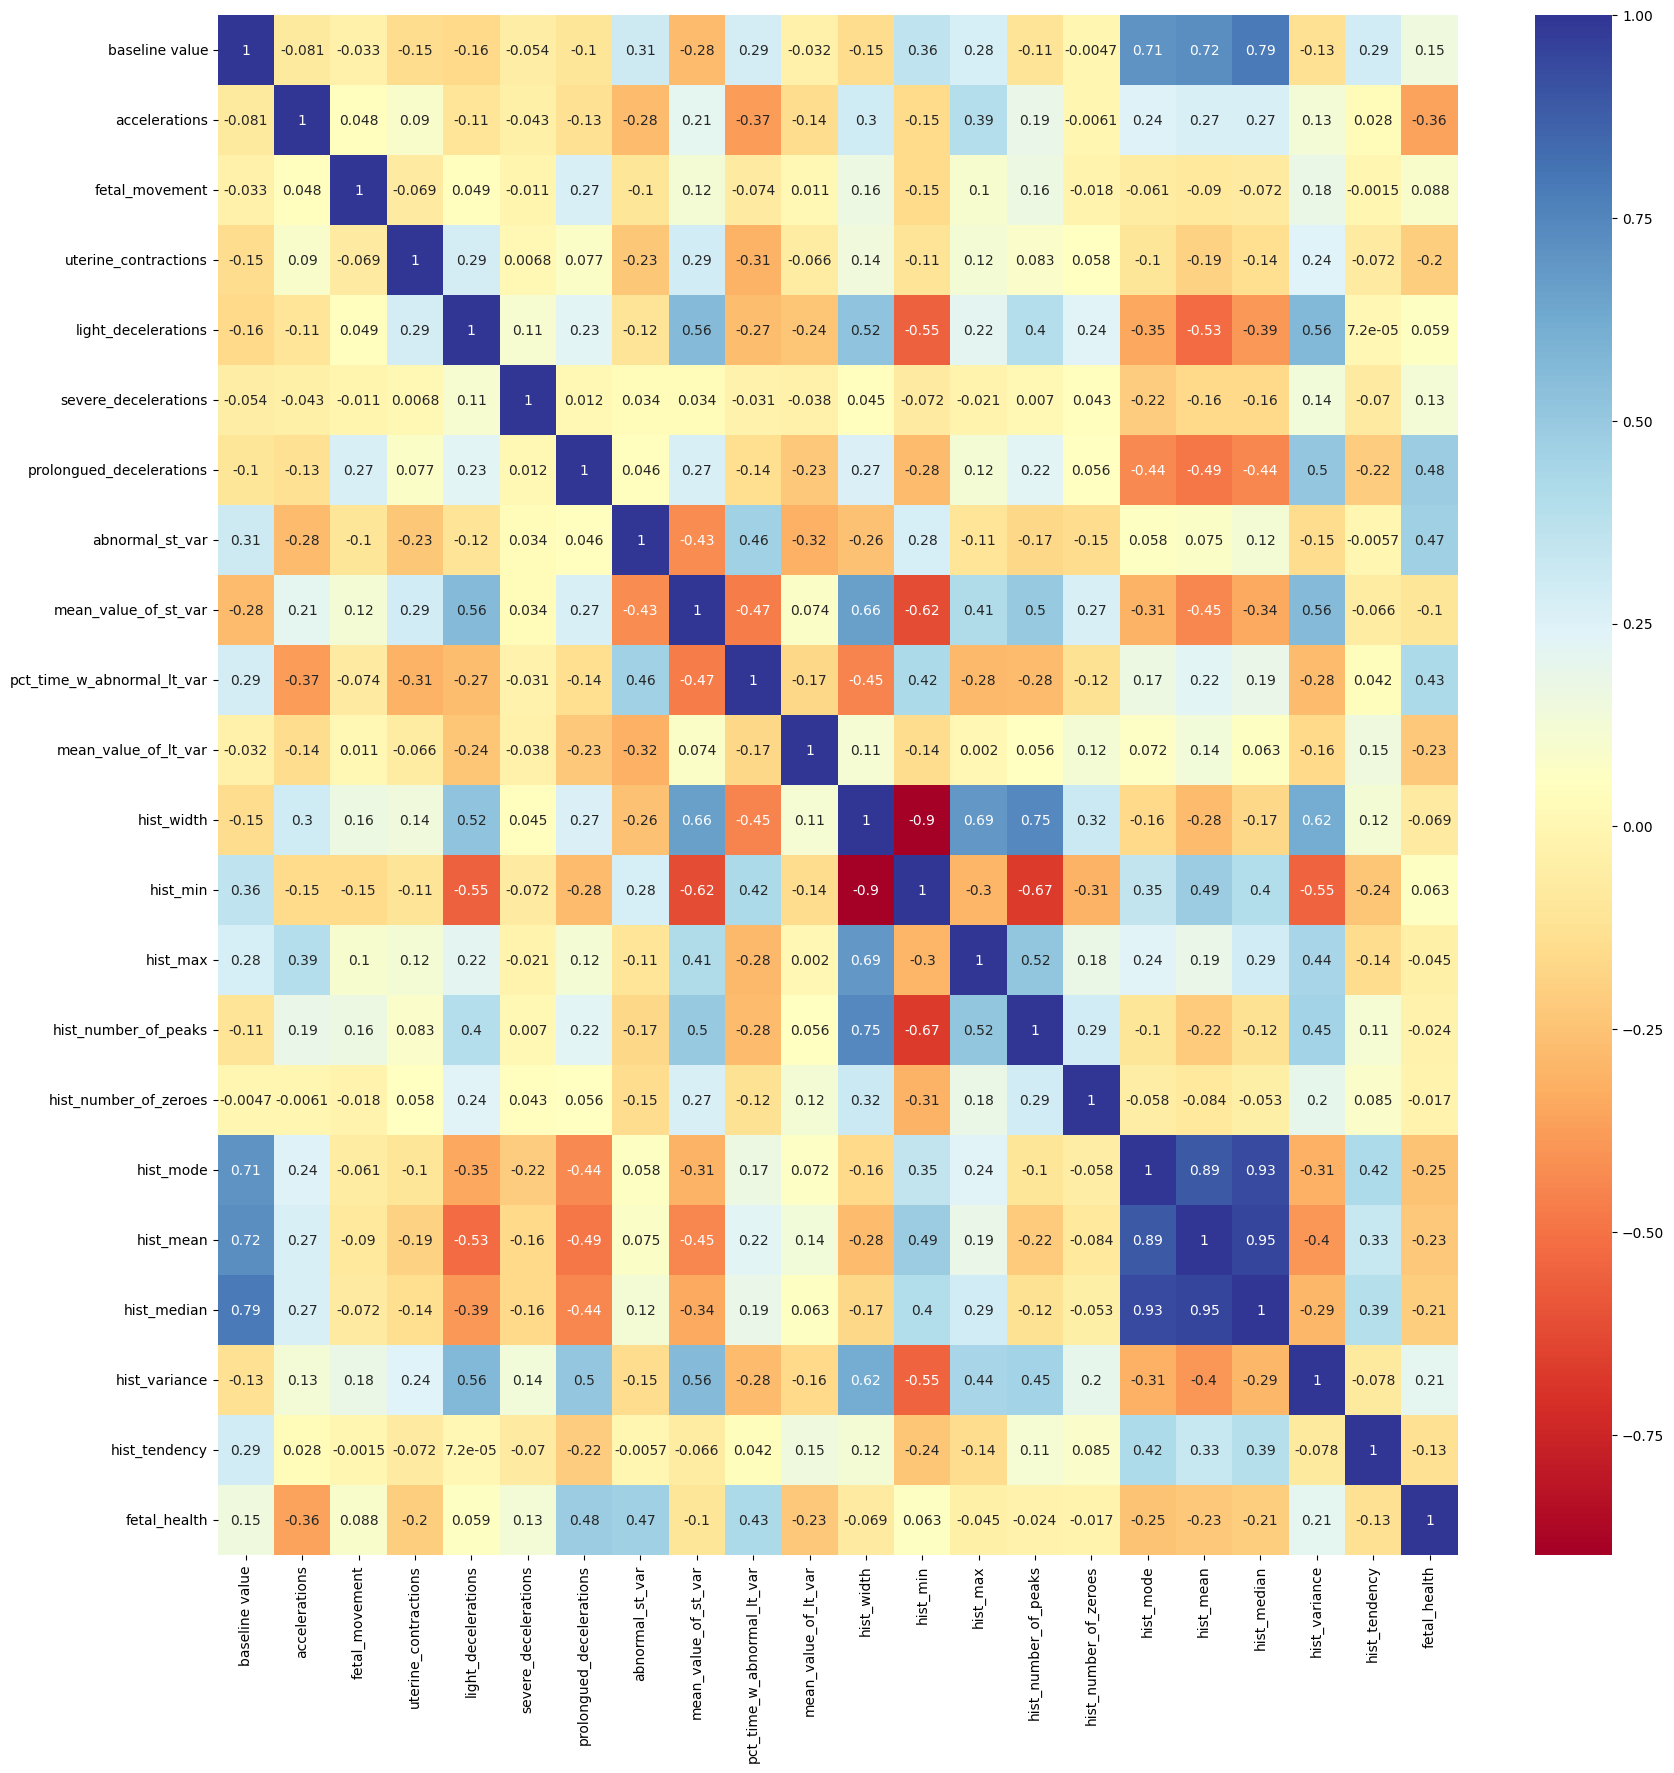

In [285]:
# plot the variables' correlation matrix
f, ax = plt.subplots(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df, cmap='RdYlBu', annot=True)

In [286]:
X = df.drop('fetal_health', axis=1) # use all features but the target
features = X.columns # store names of features used
y = df['fetal_health']

In [287]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # scale input values to even the weighting among features

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into train and test sets
X_train.shape, X_test.shape

((1700, 21), (426, 21))

In [289]:
models = [DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(random_state=42), 
          GradientBoostingClassifier(random_state=42), 
          ExtraTreesClassifier(random_state=42),
          LogisticRegression(random_state=42),
          RidgeClassifier(random_state=42),
          RidgeClassifierCV(cv=5),
          MultinomialNB(),
          GaussianNB(),
          KNeighborsClassifier(),
          RadiusNeighborsClassifier(),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          LinearSVC(multi_class='crammer_singer'),
          MLPClassifier()
          ]

In [290]:
scores = {}
# iterate through model list and fit data to each model
# capture train and test results
# store results in a dict with model as key and List[train_score, test_score] as value
for model in models:
    model.fit(X_train, y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    scores[model] = [round(train_score,4), round(test_score,6)]
scores


c:\Users\Joslyn\.virtualenvs\fetal-health-jefI1vh7\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Joslyn\.virtualenvs\fetal-health-jefI1vh7\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Joslyn\.virtualenvs\fetal-health-jefI1vh7\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Joslyn\.virtualenvs\fetal-health-jefI1vh7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{DecisionTreeClassifier(random_state=42): [1.0, 0.922535],
 RandomForestClassifier(random_state=42): [1.0, 0.946009],
 GradientBoostingClassifier(random_state=42): [0.9935, 0.948357],
 ExtraTreesClassifier(random_state=42): [1.0, 0.941315],
 LogisticRegression(random_state=42): [0.8982, 0.894366],
 RidgeClassifier(random_state=42): [0.8659, 0.868545],
 RidgeClassifierCV(cv=5): [0.8665, 0.870892],
 MultinomialNB(): [0.8041, 0.800469],
 GaussianNB(): [0.7488, 0.720657],
 KNeighborsClassifier(): [0.9335, 0.906103],
 RadiusNeighborsClassifier(): [0.8018, 0.793427],
 LinearDiscriminantAnalysis(): [0.8853, 0.882629],
 QuadraticDiscriminantAnalysis(): [0.67, 0.673709],
 LinearSVC(multi_class='crammer_singer'): [0.9018, 0.884977],
 MLPClassifier(): [0.9194, 0.901408]}

In [291]:
best_model = max(scores, key = lambda value: scores[value][1]) # find best classifier by max of scores' second value in list (test_score)
print(f'the best model is {best_model}')

the best model is GradientBoostingClassifier(random_state=42)


In [292]:
## Train again to get original training time of best classifier
start = time.time()
best_model.fit(X_train,y_train)
end = time.time()
orig_time = end-start
print(f'original time: {orig_time}')

original time: 1.1380443572998047


Number of features for atleast 95% Importance: 12


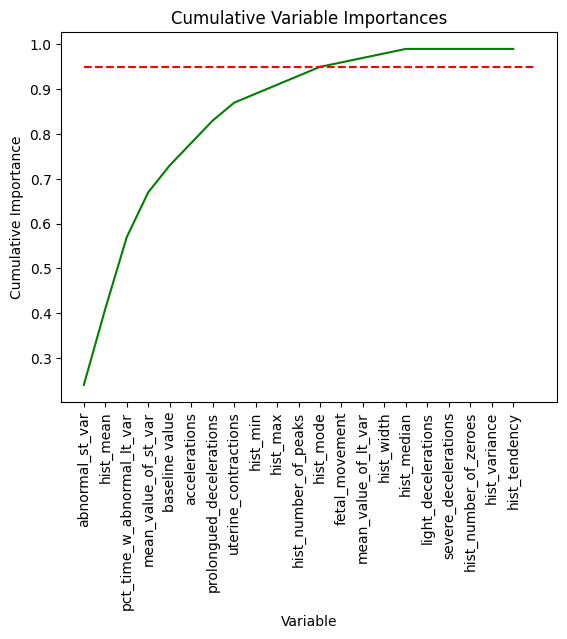

In [293]:
def plot_cum_importances(clf):
    # plot cumulative feature importances and return list of features to maintain 95% information
    importances = clf.feature_importances_
    feature_importances = [(feature, round(importance,2)) for feature, importance in zip(features, importances)]
    feature_importances = sorted(feature_importances, key = lambda tuple: tuple[1], reverse=True)
    sorted_feats = [tuple[0] for tuple in feature_importances]
    sorted_imps = [tuple[1] for tuple in feature_importances]

    cum_imps = np.cumsum(sorted_imps)
    plt.plot(sorted_feats, cum_imps, 'g-')
    plt.hlines(y=.95, xmin=0, xmax=len(sorted_feats), color='r', linestyles='dashed')
    plt.xticks(sorted_feats,rotation='vertical')
    plt.ylabel('Cumulative Importance'); plt.xlabel('Variable'); plt.title('Cumulative Variable Importances')

    val = np.where(cum_imps>=.95)[0][0]+1 # add 1 to account for python 0 indexing
    print(f'Number of features for atleast 95% Importance: {val}') 
    return sorted_feats[:val]

rel_features = plot_cum_importances(best_model)

In [294]:
# Use relevant features to retrain model and see if change in training time warrants information loss
temp_X = scaler.fit_transform(df[rel_features])
temp_X_train, temp_X_test, _, _ = train_test_split(temp_X, y, test_size=0.2, random_state=42)
print(f'columns dropped: {len(features)-len(rel_features)}')


start = time.time()
best_model.fit(X_train,y_train)
end = time.time()
new_test_score = best_model.score(X_test,y_test)

revised_time = end-start
speedup = orig_time/revised_time
print(f'new test score: {new_test_score}, accuracy lost: {scores.get(best_model)[1]-new_test_score}')
print(f'speedup: {speedup}')
if speedup > 1.5:
    X, X_train, X_test = temp_X, temp_X_train, temp_X_test
    print('speedup justifies minor information/accuracy loss. Modify features used.')
else:
    print('speedup does not justify information/accuracy loss, maintaining current feature set')

columns dropped: 9
new test score: 0.9483568075117371, accuracy lost: 1.9248826288453813e-07
speedup: 0.9798003206676258
speedup does not justify information/accuracy loss, maintaining current feature set


In [295]:
def plot_grid_search_results(gs_clf, params):
    # create lists for indices and columns, going back and forth for parameter placement
    indices, columns = [], []
    for i, param in enumerate(params.keys()):
        param = 'param_' + param
        if i%2==0:
            indices.append(param)
        elif i%2==1:
            columns.append(param)
        else:
            raise Exception('Unexpected index value: {}'.format(i)) 

    results = pd.DataFrame(gs_clf.cv_results_)
    pivot_table = results.pivot(index = indices, 
                                columns = columns, 
                                values='mean_test_score'
                                )

    # Step 9: Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', fmt=".3f", cbar=True)
    plt.title('Grid Search Results')
    xnames = list(pivot_table.columns.names)
    xaxis = ''
    for n in xnames:
        xaxis += n + ' - '
    plt.xlabel(xaxis)
    ynames = list(pivot_table.index.names)
    yaxis = ''
    for n in ynames:
        yaxis += n + ' - '
    plt.ylabel(yaxis)
    plt.show()

In [296]:
print(f'valid params to set are: {list(best_model.get_params().keys())}')

valid params to set are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start']


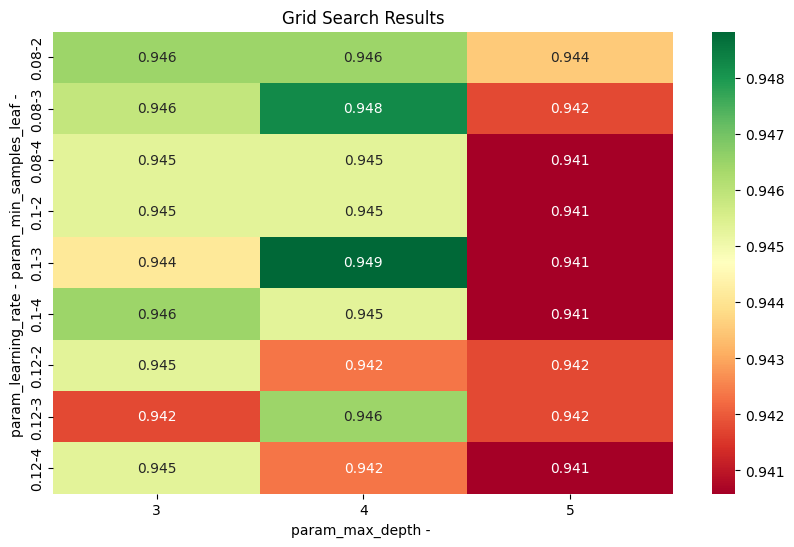

In [297]:
params = {
    "learning_rate":[.08,.1,.12],
    "max_depth" : [3,4,5],
    "min_samples_leaf" : [2,3,4]
}

grid_search = GridSearchCV(best_model, params, cv=5)
grid_search.fit(X_train, y_train)

plot_grid_search_results(grid_search, params)

In [302]:
tuned_estimator = grid_search.best_estimator_
display(tuned_estimator)
tuned_score = grid_search.best_score_
print(f'tuned best score is {tuned_score}')

GradientBoostingClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

tuned best score is 0.9488235294117647


In [303]:
orig_test_score = scores.get(best_model)[1]
print(f'test score: {orig_test_score}')

tuned_train_score = tuned_estimator.score(X_train, y_train)
tuned_test_score = tuned_estimator.score(X_test,y_test)
print(f'tuned_train_score {tuned_train_score}, tuned_test_score: {tuned_test_score}')
print(f"fine-tuning improved score by {tuned_test_score-orig_test_score}")

test score: 0.948357
tuned_train_score 0.9994117647058823, tuned_test_score: 0.9553990610328639
fine-tuning improved score by 0.007042061032863867
